In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

filenames = os.listdir(r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\train")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [3]:
df.head()

filename category
0     cat.0.jpg      cat
1     cat.1.jpg      cat
2    cat.10.jpg      cat
3   cat.100.jpg      cat
4  cat.1000.jpg      cat

<AxesSubplot:>

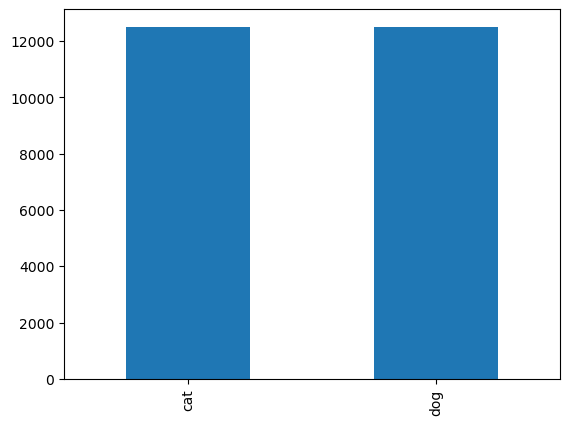

In [4]:
df['category'].value_counts().plot.bar()

In [5]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [6]:
print(train_df.shape)
print(validate_df.shape)

(20000, 2)
(5000, 2)


In [7]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15
print(train_df.shape[0],validate_df.shape[0])

20000 5000


In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [9]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
   r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\train", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

Found 20000 validated image filenames belonging to 2 classes.


In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\train", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

Found 5000 validated image filenames belonging to 2 classes.


In [11]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [12]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [13]:
# flatten the output of the convolutional part: 
x = tf.keras.layers.Flatten()(conv_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
for layer in conv_model.layers:
    layer.trainable = False

In [15]:
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])

In [16]:
history = full_model.fit_generator(
    train_generator, 
    validation_data = validation_generator,
    epochs=2
)

C:\Users\lavan\AppData\Local\Temp\ipykernel_13904\498659379.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model.fit_generator(


Epoch 1/2
313/313 [==============================] - 2505s 8s/step - loss: 0.3497 - accuracy: 0.8769 - val_loss: 0.1803 - val_accuracy: 0.9268
Epoch 2/2
313/313 [==============================] - 2842s 9s/step - loss: 0.2083 - accuracy: 0.9110 - val_loss: 0.1827 - val_accuracy: 0.9270


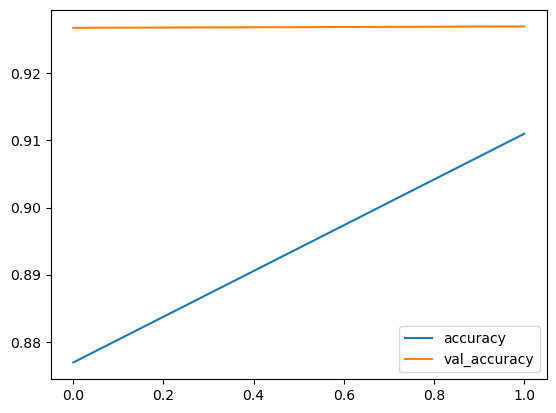

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

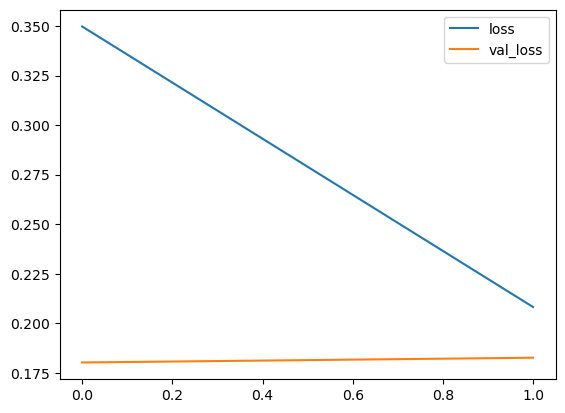

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [21]:
test_filenames = os.listdir(r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
print(test_df.shape)

(12500, 1)


In [22]:
test_df.head()

filename
0      1.jpg
1     10.jpg
2    100.jpg
3   1000.jpg
4  10000.jpg

In [24]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(224,224),
    batch_size=8,
    shuffle=False
)

Found 12500 validated image filenames.


In [26]:
predict = full_model.predict(test_generator, steps=np.ceil(nb_samples/8))

1563/1563 [==============================] - 1617s 1s/step


In [27]:
print(np.argmax(predict, axis=-1))

[1 0 0 ... 1 0 0]


In [28]:
test_df['category'] = np.argmax(predict, axis=-1)

In [29]:
test_df.head()

filename  category
0      1.jpg         1
1     10.jpg         0
2    100.jpg         0
3   1000.jpg         1
4  10000.jpg         1

In [30]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [31]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(14 , 28))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = cv2.imread(r"F:\MIT ADT\Sem 7\Deep Learning Lab\Datasets\dogs-vs-cats\test1"+filename)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()